<a href="https://colab.research.google.com/github/faris771/Handwriting_Recognition/blob/main/CV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faculty of Engineering and Technology
## Electrical and Computer Engineering Department
### Course Project + Assignment 3

**Course:** ENCS5343 - Computer Vision

**Prepared by:** Aseel Deek, Faris Abu Farha

**Student IDs:** 1190587, 1200546

**Instructor:** Dr. Aziz Qaroush

**Section:** Section: 2, Section: 1

**Due Date:** Feb, 2024

----------------------------------------------------------------------------------------------------------------------------

# Introduction:

Handwriting recognition, a **computer vision challenge**, involves identifying and converting handwritten text from documents or touchscreens into a machine-readable format. Various machine learning methods, including K-nearest neighbors, Support Vector Machines, transfer learning, and Convolutional Neural Networks (CNN), are explored for automatic handwritten recognition.
Each language's handwritten text exhibits diverse patterns influenced by factors such as age, background, and native language. Arabic script, with its semi-cursive style and right-to-left writing, presents additional challenges due to multiple character shapes based on position within a word. Consequently, recognizing Arabic script is more complex than in other languages.

This notebook implements **4 different CNN models** that classify the Arabic handwritten characters using  **AHCD dataset**.  


# Experimental Setup and Results:
 In each task, leanring curves (training loss, testing loss, training accuracy, and validation accuracy vs epoch)  were plotted and discussed. Aslo, **testing accuracy** was calculated to evaluate each model.

### Experimental Setup:
Import the needed library

In [ ]:
from google.colab import files
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

Upload the used Dataset "AHCD" dataset.

In [ ]:
uploaded = files.upload()

Saving Project data set.zip to Project data set.zip


In [ ]:
# Replace '.zip' with the a name of
with zipfile.ZipFile(io.BytesIO(uploaded['Project data set.zip']), 'r') as zip_ref:
    zip_ref.extractall('dataset_folder')

**The Dataset**
The dataset used here is the **Arabic Handwritten Characters Dataset**.

The trainIamges csv has **1024** columns and **13440** rows. Each column represents a pixel in an image and each row represents an individual grayscale image. **The value of each pixel varies from 0 -255.**

In [ ]:
train_data = pd.read_csv('dataset_folder/csvTrainImages 13440x1024.csv', header = None)
train_label = pd.read_csv('dataset_folder/csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv('dataset_folder/csvTestImages 3360x1024.csv', header = None)
test_label = pd.read_csv('dataset_folder/csvTestLabel 3360x1.csv', header = None)

print the first 5 elements of the dataset.

In [ ]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# print data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Columns: 1024 entries, 0 to 1023
dtypes: int64(1024)
memory usage: 105.0 MB


prepare the data for usage

In [ ]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

In [ ]:
print(type(train_label))

<class 'numpy.ndarray'>


**Visulaize the Dataset**


In [ ]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return int((number_of_images / number_of_columns)+1)
    else:
        return int(number_of_images / number_of_columns)

In [ ]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = x.shape[0]
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i], cmap='Greys')


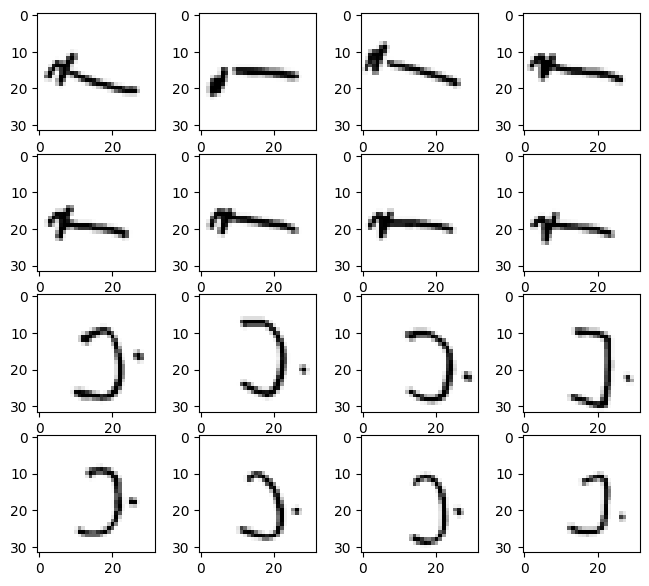

In [ ]:
display_image(train_data, 32, 16) # print the fist 16 images of the training set

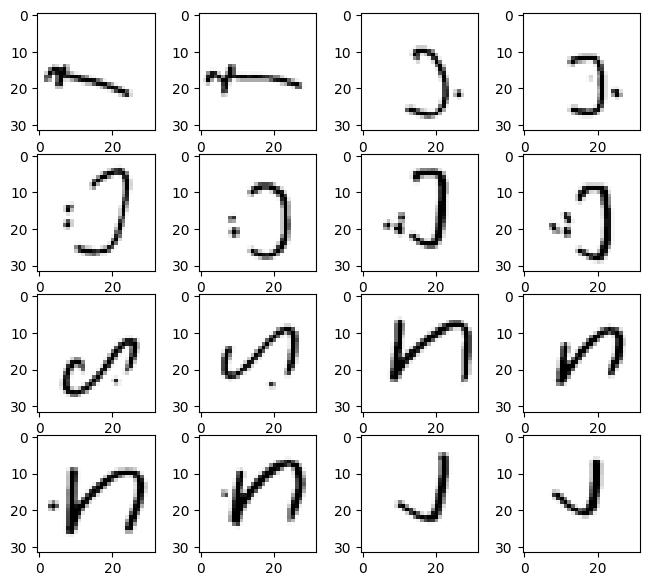

In [ ]:
display_image(test_data, 32, 16) # print the fist 16 images of the testing set

## Task#1:
Build and train a custom CNN network for AHCR. For this task, you can experiment with a set of architectures or you can refer to similar work (see the list
of references below) and choose an initial architecture and then do hyperparameter tuning.
For each model you trained, you need to plot the following:
1. Training loss vs. epoch.
2. Validation loss vs. epoch.
3. Training accuracy vs. epoch.
4. Testing accuracy vs. epoch.

## Feature Engineering:

Before building our CNN network a data preprocessing setps were performed.
1. Reshape the images into 32x32
2. Normaialize the data
3. Perform one hot encoding since target values are categorical variables.

In [ ]:
# reshape the image shape into 32 x 32
train_data = train_data.reshape(train_data.shape[0],32,32)
test_data = test_data.reshape(test_data.shape[0],32,32)

In [ ]:
# normalizing the data
train_data = train_data/255.0
test_data = test_data/255.0

Label should be encoded

In [ ]:
# shape of train label
train_label.shape

(13440, 1)

Applay hot encoding of labels

In [ ]:
# perform one hot encoding fro labels since there are catagorical
total_classes = len(np.unique(train_label))
print(total_classes)

train_label = to_categorical(train_label,total_classes)
test_label = to_categorical(test_label, total_classes)

28


In [ ]:
print(train_label.shape)

(13440, 28)


Final size of the training and testing data

In [ ]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [ ]:
print("Training Data Size:",train_data.shape)
print("Testing Data Size:",test_data.shape)

Training Data Size: (13440, 32, 32, 1)
Testing Data Size: (3360, 32, 32, 1)


## Build a Custom CNN
The customized model, was inspired by [1], a Convolutional Neural Network with 14 Layers (CNN-14):

**CNN Architecture**
- 8 conv layers
    - 1st + 2nd layers are 32 filters with 3x3 filter
    - reset is 64 filters with 3x3 filter
- 4 max pooling
- 2 fully connected layers
    - 1st layer contains **256** neurons
    - the last layer contains **28** neurons
    - apply **softmax** activation
- input image is 32x32 + grayscale image
- The padding is the same to cover all sizes of image
- The activation function is ReLU
- Adam optimizer in the model learning rate 0.001

In [ ]:
# create a 14_CNN model
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,1)), #1
    Conv2D(32, 3, padding='same', activation='relu'),#2
    MaxPooling2D(2,2), #1
    Conv2D(64, 3, padding='same', activation='relu'), #3
    Conv2D(64, 3, padding='same', activation='relu'), #4
    MaxPooling2D(2,2), #2
    Conv2D(64, 3, padding='same', activation='relu'), #5
    Conv2D(64, 3, padding='same', activation='relu'), #6
    MaxPooling2D(2,2), #3
    Dropout(0.25), #1
    Conv2D(64, 3, padding='same', activation='relu'), #7
    Conv2D(64, 3, padding='same', activation='relu'), #8
    MaxPooling2D(2,2), #4
    Dropout(0.25), #2
    Flatten(), #1
    Dense(256, activation='relu'), #1
    Dense(256, activation='relu'), #2
    Dropout(0.25), #3
    Dense(28, activation='softmax') #3
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [ ]:
# compile the model
model.compile(optimizer='adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

Train the customized CNN.

In [ ]:
history = model.fit(train_data, train_label, validation_data=(test_data, test_label), batch_size = 32, epochs = 30)

Epoch 1/30
420/420 [==============================] - 11s 9ms/step - loss: 2.3180 - accuracy: 0.2177 - val_loss: 1.2012 - val_accuracy: 0.5333
Epoch 2/30
420/420 [==============================] - 3s 7ms/step - loss: 0.9815 - accuracy: 0.6177 - val_loss: 0.5268 - val_accuracy: 0.8021
Epoch 3/30
420/420 [==============================] - 3s 7ms/step - loss: 0.5147 - accuracy: 0.8170 - val_loss: 0.3526 - val_accuracy: 0.8818
Epoch 4/30
420/420 [==============================] - 3s 7ms/step - loss: 0.3338 - accuracy: 0.8919 - val_loss: 0.2377 - val_accuracy: 0.9289
Epoch 5/30
420/420 [==============================] - 4s 8ms/step - loss: 0.2563 - accuracy: 0.9200 - val_loss: 0.2111 - val_accuracy: 0.9369
Epoch 6/30
420/420 [==============================] - 3s 7ms/step - loss: 0.1865 - accuracy: 0.9444 - val_loss: 0.1579 - val_accuracy: 0.9536
Epoch 7/30
420/420 [==============================] - 3s 7ms/step - loss: 0.1787 - accuracy: 0.9469 - val_loss: 0.1427 - val_accuracy: 0.9628
Epoch

**Plot the learning carves for the model**

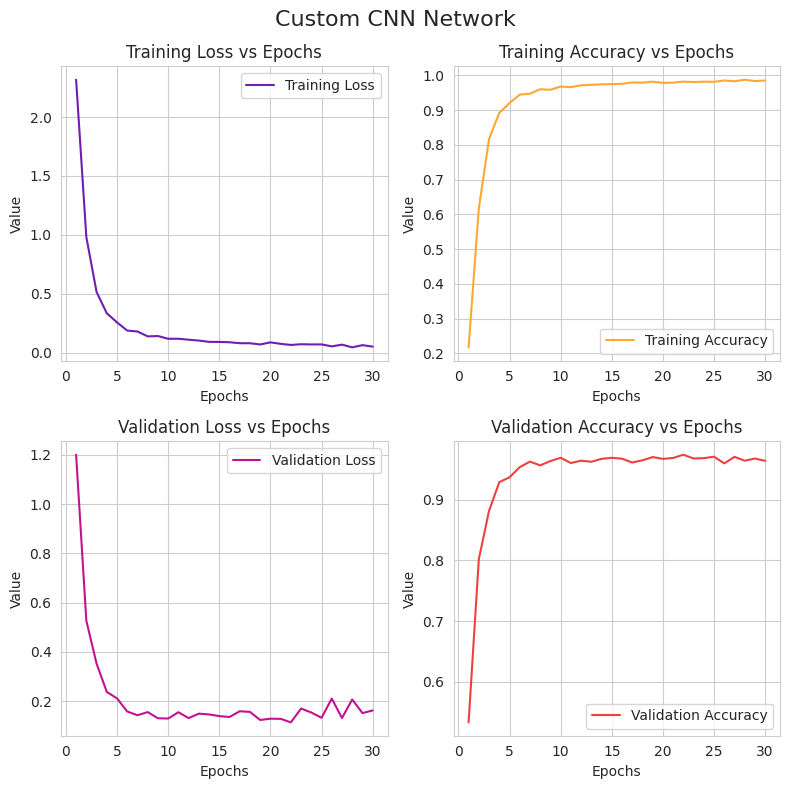

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("bright")

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(hspace=0.5)
titles = ['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy']
keys = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
colors = ['#711DB0', '#FFA732', '#C21292', '#EF4040']

epochs = np.arange(1, 31)

for i in range(4):
    row, col = divmod(i, 2)
    axs[row, col].plot(epochs, history.history[keys[i]], label=titles[i], color=colors[i])
    axs[row, col].set_title(f'{titles[i]} vs Epochs')
    axs[row, col].set_xlabel('Epochs')
    axs[row, col].set_ylabel('Value')
    axs[row, col].legend()

fig.suptitle('Custom CNN Network', size=16)
plt.tight_layout()
plt.show()

**Validation Accuracy is Testing Accuracy**

**calculate the testing accuracy:**

In [ ]:
prediction = model.predict(test_data)
prediction = np.argmax(prediction,axis = 1)

105/105 [==============================] - 1s 3ms/step


In [ ]:
true_labels_categorical = np.argmax(test_label, axis=1)
cm = confusion_matrix(true_labels_categorical, prediction)

accuracy = accuracy_score(true_labels_categorical, prediction)
print(f'Accuracy ={accuracy*100:.2f}%')

Accuracy =96.40%


### **Results**:
so far, the model is can be classified as a good fit. The leanring curves show no overfitting neither underfitting. **And the Testing Accuracy is 96.40%**

# Task #2: Add Data Augmentation
you must select at least **three data augmentation techniques** that
are appropriate and for the model you trained, you need to plot the following:
1. Training loss vs. epoch.
2. Validation loss vs. epoch.
3. Training accuracy vs. epoch.
4. Testing accuracy vs. epoch.

To expands the training data and helps prevent overfitting, improving the model's ability to generalize and recognize objects in diverse scenarios, **data augmentation technique** was used.

In [ ]:
datagen = ImageDataGenerator(
        zoom_range =0.1,
        rotation_range =20,
        height_shift_range=0.2,
        width_shift_range=0.1,
        horizontal_flip=False
       )

The transformations that are selected:
* zoom by 0.1 to help model become more robust to different writing sizes and provides a form of regularization.
* rotation_range =20, to help the model in handling diverse writing styles and orientations.
* hight, width shift, This helps the model adapt to different line heights and writing styles.


In [ ]:
datagen.fit(train_data)

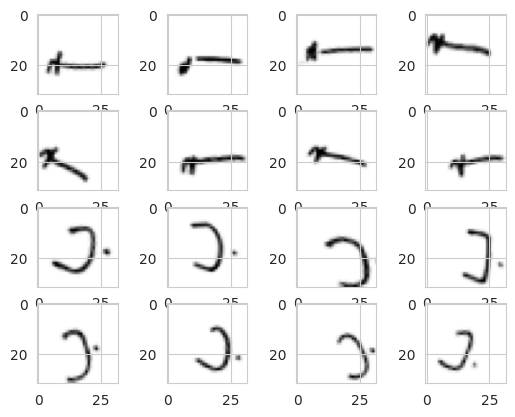

In [ ]:
# print the new data
for X_batch, y_batch in datagen.flow(train_data, train_label, batch_size=16, shuffle=False):
    for i in range(0, 16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i]/255, cmap='Greys')
    break

In [ ]:
history_with_Darg= model.fit_generator(datagen.flow(train_data,train_label, batch_size=100), validation_data=(test_data, test_label), epochs = 30)

Epoch 1/30


<ipython-input-29-a9586cb5f6e6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_with_Darg= model.fit_generator(datagen.flow(train_data,train_label, batch_size=100), validation_data=(test_data, test_label), epochs = 30)


135/135 [==============================] - 8s 48ms/step - loss: 0.2857 - accuracy: 0.9250 - val_loss: 0.1212 - val_accuracy: 0.9741
Epoch 2/30
135/135 [==============================] - 5s 38ms/step - loss: 0.2242 - accuracy: 0.9365 - val_loss: 0.1118 - val_accuracy: 0.9756
Epoch 3/30
135/135 [==============================] - 6s 45ms/step - loss: 0.1949 - accuracy: 0.9475 - val_loss: 0.1014 - val_accuracy: 0.9801
Epoch 4/30
135/135 [==============================] - 5s 38ms/step - loss: 0.1942 - accuracy: 0.9482 - val_loss: 0.1116 - val_accuracy: 0.9786
Epoch 5/30
135/135 [==============================] - 6s 45ms/step - loss: 0.1775 - accuracy: 0.9492 - val_loss: 0.0987 - val_accuracy: 0.9818
Epoch 6/30
135/135 [==============================] - 5s 40ms/step - loss: 0.1560 - accuracy: 0.9556 - val_loss: 0.0923 - val_accuracy: 0.9798
Epoch 7/30
135/135 [==============================] - 5s 38ms/step - loss: 0.1595 - accuracy: 0.9548 - val_loss: 0.1045 - val_accuracy: 0.9789
Epoch 8/30

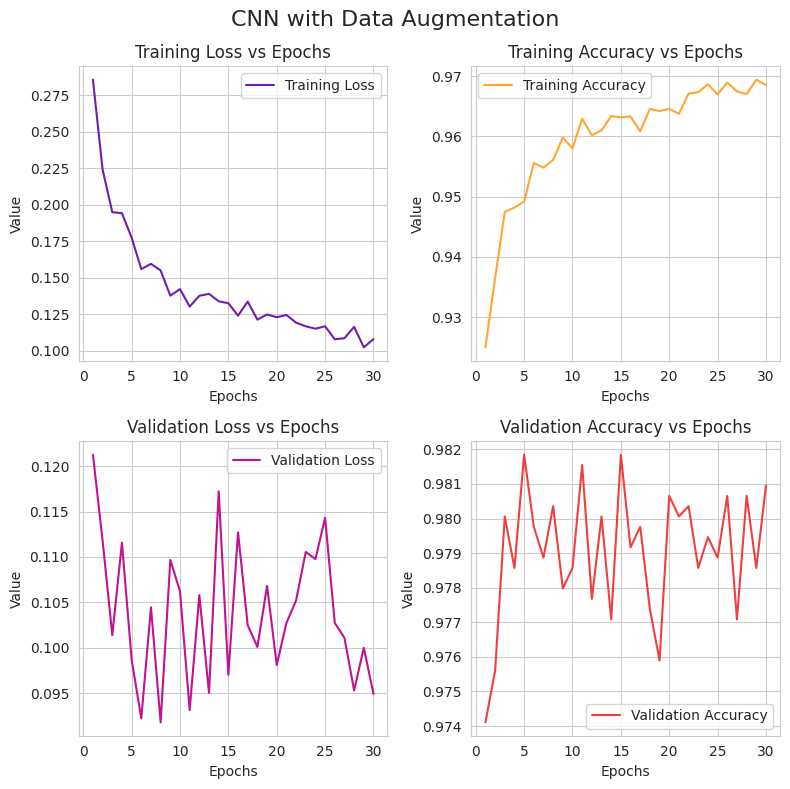

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("bright")

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(hspace=0.5)
titles = ['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy']
keys = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
colors = ['#711DB0', '#FFA732', '#C21292', '#EF4040']

epochs = np.arange(1, 31)

for i in range(4):
    row, col = divmod(i, 2)
    axs[row, col].plot(epochs, history_with_Darg.history[keys[i]], label=titles[i], color=colors[i])
    axs[row, col].set_title(f'{titles[i]} vs Epochs')
    axs[row, col].set_xlabel('Epochs')
    axs[row, col].set_ylabel('Value')
    axs[row, col].legend()

fig.suptitle('CNN with Data Augmentation', size=16)
plt.tight_layout()
plt.show()

**Validation Accuracy is Testing Accuracy**

In [ ]:
predictions = model.predict(test_data)
predictions = np.argmax(predictions,axis = 1)

105/105 [==============================] - 0s 2ms/step


In [ ]:
true_labels_categorical = np.argmax(test_label, axis=1)
cm = confusion_matrix(true_labels_categorical, predictions)

accuracy = accuracy_score(true_labels_categorical, predictions)
print(f'Accuracy ={accuracy*100:.2f}%')

Accuracy =98.10%


### **Results**:
Since data augmentation introduces variations and diversity into the training dataset, which helps the model become more robust and better generalize to different scenarios, Training accuracy improved to **98.10%**.

|Tasks       |Accuracy  
|:----------:|:---:|
|Task #1     |96.40%
|Task #2     |98.10%

Task #2 learning plots show that the validation accuracy and validation loss plots suggest **Unrepresentative Validation**: means that the validation dataset does not provide sufficient information to evaluate the ability of the model to generalize.


# TASK #3:

##  Task 3: Select a CNN network from a list of well-known and published CNN architectures
such as LeNet, AlexNet, ResNet, and so on. You must make a tradeoff between accuracy and network complexity with
respect to the problem and the dataset provided. Train it using the data augmentation techniques you
used in Task 2.
For the model you trained, you need to plot the following:
1. Training loss vs. epoch.

2. Validation loss vs. epoch.

3. Training accuracy vs. epoch.

4. Testing accuracy vs. epoch.

Compare the results you obtained with the results of Task 1 and Task 2.

## 3.1 LeNet-5


since our dataset is 32x32x1, We're going to use Lenet5 Architicure, whereas it was designed for a smiple task for digit recogintion, which in complexity similar to our problem, as well as it's designed for 32x32x1 input images and it's a simple architecture, that suits our problem.

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
NUMBER_OF_CLASSES = 28

EPOCHS = 30


In [ ]:
from abc import ABC, abstractmethod # Abstract Base Class

class Models(ABC): # Abstract class for all models

  @abstractmethod
  def build(self): # Abstract method for polymorphism
    pass

In [ ]:
class LeNet5(Models): # LeNet-5 model

  def build(self):
    """

      Layers used are:
      Conv2D, MaxPooling2D, Flatten, Dense.
      Activation function used is ReLU for all layers except the output layer which uses Softmax.
      The model is compiled using Adam optimizer and Sparse Categorical Crossentropy loss function.
      The model is trained for 30 epochs.


    """
    model = models.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)), # 1st Convolutional layer with 6 filters and 5x5 kernel size
    layers.MaxPooling2D(pool_size=(2, 2)), # 1st MaxPooling layer with 2x2 pool size
    layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'), # 2nd Convolutional layer with 16 filters and 5x5 kernel size
    layers.MaxPooling2D(pool_size=(2, 2)), # 2nd MaxPooling layer with 2x2 pool size
    layers.Flatten(),# Flatten layer to flatten the output of the previous layer to be ready for the fully connected layer
    layers.Dense(120, activation='relu'), # 1st Dense layer with 120 neurons
    layers.Dense(84, activation='relu'), # 2nd Dense layer with 84 neurons
    layers.Dense(NUMBER_OF_CLASSES, activation='softmax') # Output layer for 28 classes
    ])

    return model



class VGG(Models):

  def build(self):

    """
      Layers used are:
      Conv2D, MaxPooling2D, Flatten, Dense.
      Activation function used is ReLU for all layers except the output layer which uses Softmax.
      The model is compiled using Adam optimizer and Sparse Categorical Crossentropy loss function.
      The model is trained for 30 epochs.
      The model has been changed to fit the input shape of the dataset.

    """

    model = Sequential() # Sequential model
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 1))) # 1st Convolutional layer with 32 filters and 3x3 kernel size
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu")) # 2nd Convolutional layer with 32 filters and 3x3 kernel size
    model.add(MaxPooling2D(pool_size=(2, 2))) # 1st MaxPooling layer with 2x2 pool size

    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) # 3rd Convolutional layer with 64 filters and 3x3 kernel size
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu")) # 4th Convolutional layer with 64 filters and 3x3 kernel size
    model.add(MaxPooling2D(pool_size=(2, 2))) # 2nd MaxPooling layer with 2x2 pool size

    model.add(Flatten()) # Flatten layer to flatten the output of the previous layer to be ready for the fully connected layer
    model.add(Dense(128, activation="relu")) # 1st Dense layer with 128 neurons
    model.add(Dropout(0.25)) # Dropout layer with 0.25 dropout rate
    model.add(Dense(28, activation="softmax")) # Output layer for 28 classes

    return model



In [ ]:

class Performance: # Class for performance evaluation

  def plot_performance(self, history, model_name):
    # Plotting the performance of the model
    sns.set_style("whitegrid")
    sns.set_palette("bright")

    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    plt.subplots_adjust(hspace=0.5)
    titles = ['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy']
    keys = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
    colors = ['#711DB0', '#FFA732', '#C21292', '#EF4040']

    epochs = np.arange(1, EPOCHS + 1)

    for i in range(4):
        row, col = divmod(i, 2)
        axs[row, col].plot(epochs, history.history[keys[i]], label=titles[i], color=colors[i])
        axs[row, col].set_title(f'{titles[i]} vs Epochs')
        axs[row, col].set_xlabel('Epochs')
        axs[row, col].set_ylabel('Value')
        axs[row, col].legend()

    fig.suptitle(model_name, size=16)
    plt.tight_layout()
    plt.show()

In [ ]:
leNet5_model = LeNet5().build() # Building the model
leNet5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:

leNet5_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compiling the model with Adam optimizer and categorical crossentropy loss function
leNet5_history = leNet5_model.fit( datagen.flow(train_data,train_label, batch_size=100), epochs=EPOCHS, validation_data=(test_data, test_label)) # Training the model


Epoch 1/30
135/135 [==============================] - 9s 44ms/step - loss: 2.8437 - accuracy: 0.1496 - val_loss: 1.8150 - val_accuracy: 0.3952
Epoch 2/30
135/135 [==============================] - 5s 34ms/step - loss: 1.8553 - accuracy: 0.3973 - val_loss: 1.2428 - val_accuracy: 0.5554
Epoch 3/30
135/135 [==============================] - 6s 41ms/step - loss: 1.4657 - accuracy: 0.5086 - val_loss: 0.9195 - val_accuracy: 0.6899
Epoch 4/30
135/135 [==============================] - 5s 40ms/step - loss: 1.2584 - accuracy: 0.5781 - val_loss: 0.9178 - val_accuracy: 0.6631
Epoch 5/30
135/135 [==============================] - 5s 35ms/step - loss: 1.1373 - accuracy: 0.6121 - val_loss: 0.7693 - val_accuracy: 0.7146
Epoch 6/30
135/135 [==============================] - 5s 35ms/step - loss: 1.0374 - accuracy: 0.6446 - val_loss: 0.7020 - val_accuracy: 0.7420
Epoch 7/30
135/135 [==============================] - 5s 38ms/step - loss: 0.9729 - accuracy: 0.6653 - val_loss: 0.6907 - val_accuracy: 0.7494

In [ ]:
test_loss, test_acc = leNet5_model.evaluate(test_data, test_label) # Evaluating the model
print('Test accuracy:', test_acc) # Printing the test accuracy


105/105 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8741
Test accuracy: 0.8741071224212646


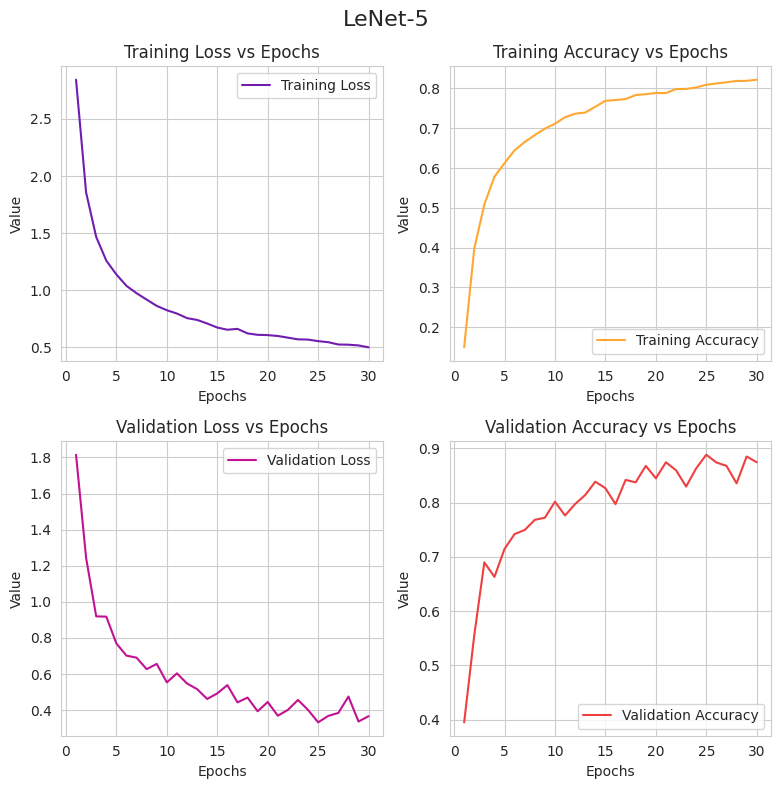

In [ ]:
p = Performance() # Creating an object of the Performance class
p.plot_performance(history=leNet5_history, model_name= 'LeNet-5') # Plotting the performance of the model

**Validation Accuracy is Testing Accuracy**

 validation loss are decreasing and the accuracy is increasing, and the model is converging. From the above plots we can see that model is promising. The model test accuracy is **87.41%**, which is a good result in general, but there might be better model for our task, we will try other architicture.

## 3.2 VGG Architicture

Our second model is VGG16, which is a more complex model than Lenet5, and it's designed for 224x224x3 input images, so we're going to use the  architecture with few changes to fit our 32x32x1 input images.

In [ ]:
vgg_model = VGG().build()
vgg_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
vgg_history = vgg_model.fit(datagen.flow(train_data,train_label, batch_size=100), epochs=EPOCHS, validation_data=(test_data, test_label))


Epoch 1/30
135/135 [==============================] - 9s 46ms/step - loss: 2.6689 - accuracy: 0.2051 - val_loss: 1.3097 - val_accuracy: 0.5375
Epoch 2/30
135/135 [==============================] - 5s 40ms/step - loss: 1.6518 - accuracy: 0.4433 - val_loss: 0.9216 - val_accuracy: 0.6646
Epoch 3/30
135/135 [==============================] - 5s 35ms/step - loss: 1.2000 - accuracy: 0.5906 - val_loss: 0.5161 - val_accuracy: 0.8244
Epoch 4/30
135/135 [==============================] - 6s 43ms/step - loss: 0.9773 - accuracy: 0.6641 - val_loss: 0.4168 - val_accuracy: 0.8628
Epoch 5/30
135/135 [==============================] - 6s 42ms/step - loss: 0.8308 - accuracy: 0.7190 - val_loss: 0.3549 - val_accuracy: 0.8818
Epoch 6/30
135/135 [==============================] - 5s 37ms/step - loss: 0.7192 - accuracy: 0.7519 - val_loss: 0.3560 - val_accuracy: 0.8753
Epoch 7/30
135/135 [==============================] - 5s 39ms/step - loss: 0.6461 - accuracy: 0.7806 - val_loss: 0.2776 - val_accuracy: 0.9077

In [ ]:
test_loss, test_acc = vgg_model.evaluate(test_data, test_label)
print('Test accuracy:', test_acc*100, "%")


105/105 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9622
Test accuracy: 96.22023701667786 %


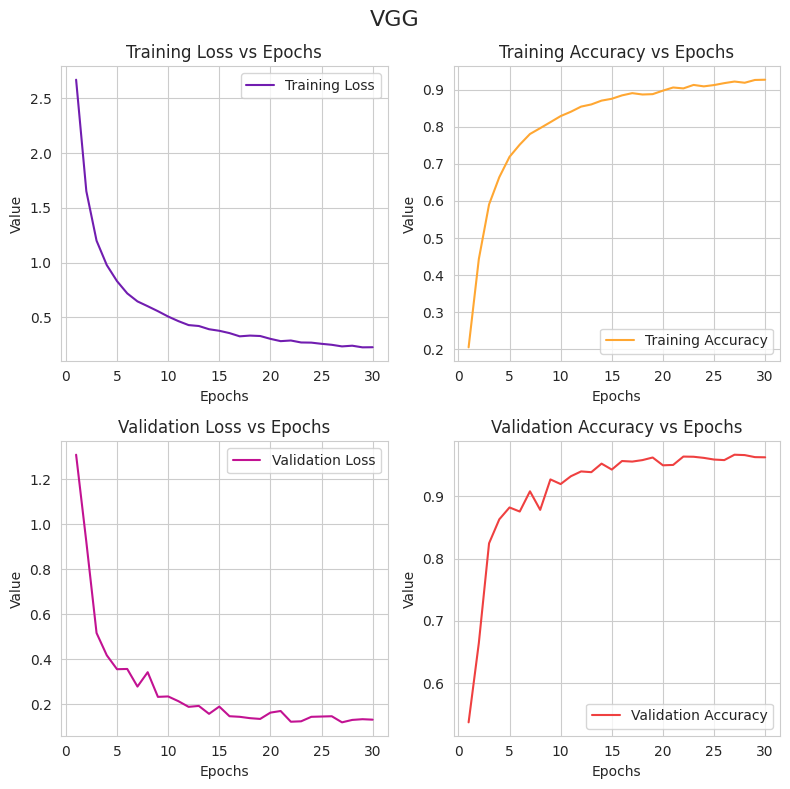

In [ ]:
p.plot_performance(history=vgg_history,model_name= 'VGG')

**Validation Accuracy is Testing Accuracy**

### **Results**:
From the above plots we can see that, the training and validation loss are decreasing and the accuracy is increasing, which means that the model is converging. The model test accuracy is **96.22%** the model is far better than LeNet5 model which had **87.41%** accuracy. Also it has been noticed that data augmentation has a great impact on the model performance, as the model without data augmentation had **92%** accuracy. because augmentation creates more examples for the model to train on, which makes the model more robust and generalize better.

|Models       |Test Accuracy  
|:----------:|:---:|
|LeNet-5      |96.22%
|VGG-16      |87.41%

### **Comparison with Task1, and Task 2**

|Tasks       |Best Accuracy  
|:----------:|:---:|
|Task #1     |96.40%
|Task #2     |98.10%
|Task #3     | 96.22%

From the above table we can see that the best accuracy have been seen so far was from **Task #2** which was **98.10%**, it's due the more complexity in the custom model which seems to fit our problem better.

# **Task #4**:
Use a pre-trained CNN network on similar tasks and choose the appropriate transfer learning
method to fine tune the pretrained network on the given dataset.

### **Answers**:
For this task, a pre-trained model was employed, initially trained on Russian lowercase handwritten letters [2][3]. The fine-tuning approach was utilized, involving the loading of the pre-trained model and the freezing of its weights to retain valuable information for subsequent training. Subsequently, convolutional layers, max-pooling, and drop-out layers were introduced to adapt the model to our dataset. The original output layer was excluded, and a new output layer with the appropriate number of classes, in this case, "28," was added to tailor the model to the specific classification task.

In [ ]:
uploaded_trans_model = files.upload()

Saving weights.best.letters.hdf5 to weights.best.letters.hdf5


In [ ]:
def top_3_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [ ]:
from keras.models import load_model
# load the model that will be used in transfer learning :
transfer_model =  load_model('/content/weights.best.letters.hdf5', custom_objects={'top_3_categorical_accuracy': top_3_categorical_accuracy})

In [ ]:
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                      

**This is the original CNN that will be fine-tuned.**

Start the transfer learning:

In [ ]:
from keras import models, layers

# freez the layers to perform fine-tunning
for layer in transfer_model.layers:
    layer.trainable = False

new_model = models.Sequential()
new_model.add(layers.Conv2D(3, (3, 3), input_shape=(32, 32, 1), padding='same'))

# Extract features using transfer_model (excluding the last layer)
for layer in transfer_model.layers[:-4]:
    new_model.add(layer)


# Add your additional convolutional layers
new_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Dropout(0.25))


# Add your additional layers
new_model.add(layers.Flatten())
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(28, activation='softmax'))

new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 3)         30        
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 128)       131200    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 128)       0         
                                                      

This is the new CNN network thay will be used for transfer learning.

In [ ]:
new_model.compile(optimizer= 'adam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model_histo = new_model.fit(datagen.flow(train_data,train_label, batch_size=100), epochs=30, validation_data=(test_data, test_label))

Epoch 1/30
135/135 [==============================] - 9s 55ms/step - loss: 2.7222 - accuracy: 0.1894 - val_loss: 1.4153 - val_accuracy: 0.5756
Epoch 2/30
135/135 [==============================] - 5s 38ms/step - loss: 1.8230 - accuracy: 0.4088 - val_loss: 0.8792 - val_accuracy: 0.7277
Epoch 3/30
135/135 [==============================] - 6s 47ms/step - loss: 1.4446 - accuracy: 0.5194 - val_loss: 0.6681 - val_accuracy: 0.7946
Epoch 4/30
135/135 [==============================] - 5s 38ms/step - loss: 1.2399 - accuracy: 0.5840 - val_loss: 0.5241 - val_accuracy: 0.8232
Epoch 5/30
135/135 [==============================] - 6s 44ms/step - loss: 1.0982 - accuracy: 0.6282 - val_loss: 0.4889 - val_accuracy: 0.8393
Epoch 6/30
135/135 [==============================] - 5s 38ms/step - loss: 1.0132 - accuracy: 0.6607 - val_loss: 0.4364 - val_accuracy: 0.8607
Epoch 7/30
135/135 [==============================] - 5s 38ms/step - loss: 0.9432 - accuracy: 0.6788 - val_loss: 0.4014 - val_accuracy: 0.8714

In [ ]:
prediction = new_model.predict(test_data)
prediction = np.argmax(prediction,axis = 1)

true_labels_categorical = np.argmax(test_label, axis=1)
cm = confusion_matrix(true_labels_categorical, prediction)

accuracy = accuracy_score(true_labels_categorical, prediction)
print(f'Accuracy ={accuracy*100:.2f}%')

105/105 [==============================] - 0s 3ms/step
Accuracy =94.64%


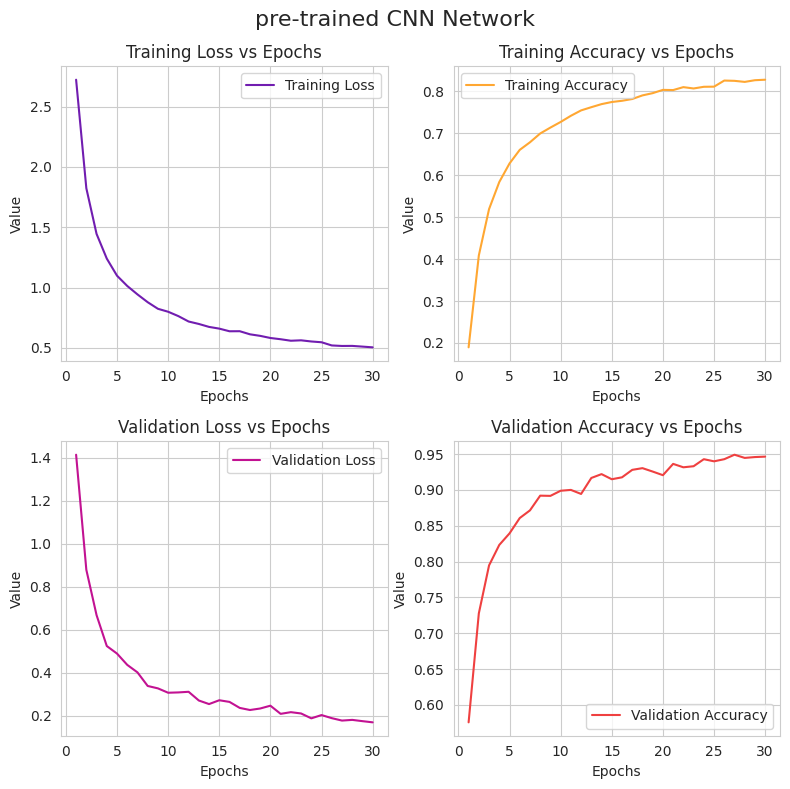

In [ ]:
p = Performance()
p.plot_performance(history=new_model_histo ,model_name= 'pre-trained CNN Network')

**Validation Accuracy is Testing Accuracy**

### **Results**:

Task #4 learning plots for the tine-tuned model's performance model shows no signs of overfitting or underfitting.

|Tasks       |Accuracy | # of epochs
|:----------:|:---:    | :--------:|
|Task #1     |96.40%   | 30
|Task #2     |98.10%   | 30
|Task #3     |96.22%   | 30
|Task #4     |94.64%   | 30

* The customized model seems particularly effective, outperforming the other models in Task #2.
* The VGG model's accuracy is competitive, showcasing the strength of deep architectures in image classification tasks.
* The transferred model, likely based on a pre-trained architecture, performed well, although not surpassing the customized model.

# Conclusion:

In summary, the customized model excelled in both Task #1 (96.40%) and Task #2 (98.10%), showcasing the effectiveness of its architecture and training strategy over 30 epochs. The VGG model achieved a commendable accuracy of 96.22% for Task #3, demonstrating its capability in capturing complex features. The transferred model, while slightly lower at 94.64% for Task #4, still exhibited strong performance after 30 epochs of fine-tuning. These results underscore the versatility of the models in handling diverse classification tasks, with considerations for architecture and training duration playing a pivotal role in their success.

# References:
[1] [Arabic
Handwritten Character Recognition Using Convolutional Neural Networks.](https://10.21203/rs.3.rs-3141935/v1)

[2] [Classification of Russian Handwritten Letters](https://www.kaggle.com/code/bryanb/cnn-for-handwritten-letters-classification/notebook)
[weights.best.letters.hdf5](https://www.kaggle.com/code/bryanb/cnn-for-handwritten-letters-classification/output)

[3][ weights.best.letters.hdf5](https://www.kaggle.com/code/bryanb/cnn-for-handwritten-letters-classification/output)